# トレード集計

In [1]:
import sys
sys.path.append('../')
%cd '..'

/home/ubuntu/repo/bakuchi


In [2]:
import src.utils.trades_report as report

%reload_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import japanize_matplotlib

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)

In [4]:
results = report.read_results()

In [5]:
# results

In [6]:
trades = pd.DataFrame()

In [7]:
trades["Bot利益"] = results["bot_profit_jpy"]
trades["市場利益"] = results["market_profit_jpy"]
trades["取引利益"] = results["trade_profit_jpy"]
trades.index.name = "トレード日時"

In [8]:
trades.tail(10)

,Bot利益,市場利益,取引利益
トレード日時,,,
2020-04-21 00:43:33,-598.0,-515.144,-82.856
2020-04-21 09:39:06,-208.0,-171.914,-36.086
2020-05-04 18:41:28,101.0,99.692,1.308
2020-05-05 08:30:58,208.0,210.397,-2.397
2020-05-07 00:16:20,33.0,47.404,-14.404
2020-05-07 07:08:24,81.0,98.786,-17.786
2021-03-31 19:48:12,10.0,13.255,-3.255
2021-04-03 09:23:35,-1018.0,-390.296,-627.704
2021-04-13 16:50:24,278.0,465.619,-187.619


## 累計利益

In [9]:
trades["date"] = pd.to_datetime(trades.index).date

In [10]:
trades_days = trades.groupby("date").sum()
trades_days_comsum = trades_days.cumsum()

In [11]:
trades_days["Bot利益[累計]"] = trades_days_comsum["Bot利益"]
trades_days["市場利益[累計]"] = trades_days_comsum["市場利益"]
trades_days["取引利益[累計]"] = trades_days_comsum["取引利益"]
trades_days.index.name = "日付"

In [12]:
trades_days.tail(10)

,Bot利益,市場利益,取引利益,Bot利益[累計],市場利益[累計],取引利益[累計]
日付,,,,,,
2020-03-25,-462.0,191.872,-653.872,-387.093,1138.584,-1525.677
2020-03-30,241.0,459.642,-218.642,-146.093,1598.226,-1744.319
2020-04-03,-199.0,25.263,-224.263,-345.093,1623.489,-1968.582
2020-04-21,-806.0,-687.058,-118.942,-1151.093,936.431,-2087.524
2020-05-04,101.0,99.692,1.308,-1050.093,1036.123,-2086.216
2020-05-05,208.0,210.397,-2.397,-842.093,1246.520,-2088.613
2020-05-07,114.0,146.190,-32.190,-728.093,1392.710,-2120.803
2021-03-31,10.0,13.255,-3.255,-718.093,1405.965,-2124.058
2021-04-03,-1018.0,-390.296,-627.704,-1736.093,1015.669,-2751.762


In [13]:
trades_days = trades_days.reset_index()
trades_days["id"] = trades_days.index

## 取引利益

<AxesSubplot:xlabel='id', ylabel='取引利益'>

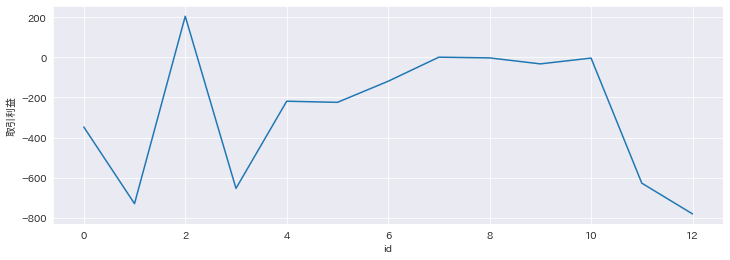

In [14]:
sns.lineplot(data=trades_days, x='id', y="取引利益")

## 取引利益(累計)

<AxesSubplot:xlabel='id', ylabel='取引利益[累計]'>

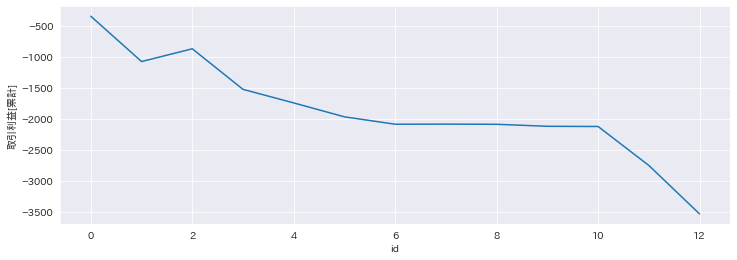

In [15]:
sns.lineplot(data=trades_days, x='id', y="取引利益[累計]")